In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotly.express as px

# Load the dataset



In [5]:
data = pd.read_csv("D:/LIFE EXPECTANCY WHO/archive (1)/Life Expectancy Data.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
data.info()
data.isnull().sum()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

(2938, 22)

In [7]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
data.isnull().any()

Country                            False
Year                               False
Status                             False
Life expectancy                     True
Adult Mortality                     True
infant deaths                      False
Alcohol                             True
percentage expenditure             False
Hepatitis B                         True
Measles                            False
 BMI                                True
under-five deaths                  False
Polio                               True
Total expenditure                   True
Diphtheria                          True
 HIV/AIDS                          False
GDP                                 True
Population                          True
 thinness  1-19 years               True
 thinness 5-9 years                 True
Income composition of resources     True
Schooling                           True
dtype: bool

In [9]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
import pandas as pd
from sklearn.impute import KNNImputer
columns_with_missing_values = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
imputer = KNNImputer(n_neighbors=5)
data[columns_with_missing_values] = imputer.fit_transform(data[columns_with_missing_values])

In [11]:
data[columns_with_missing_values] = imputer.fit_transform(data[columns_with_missing_values])
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


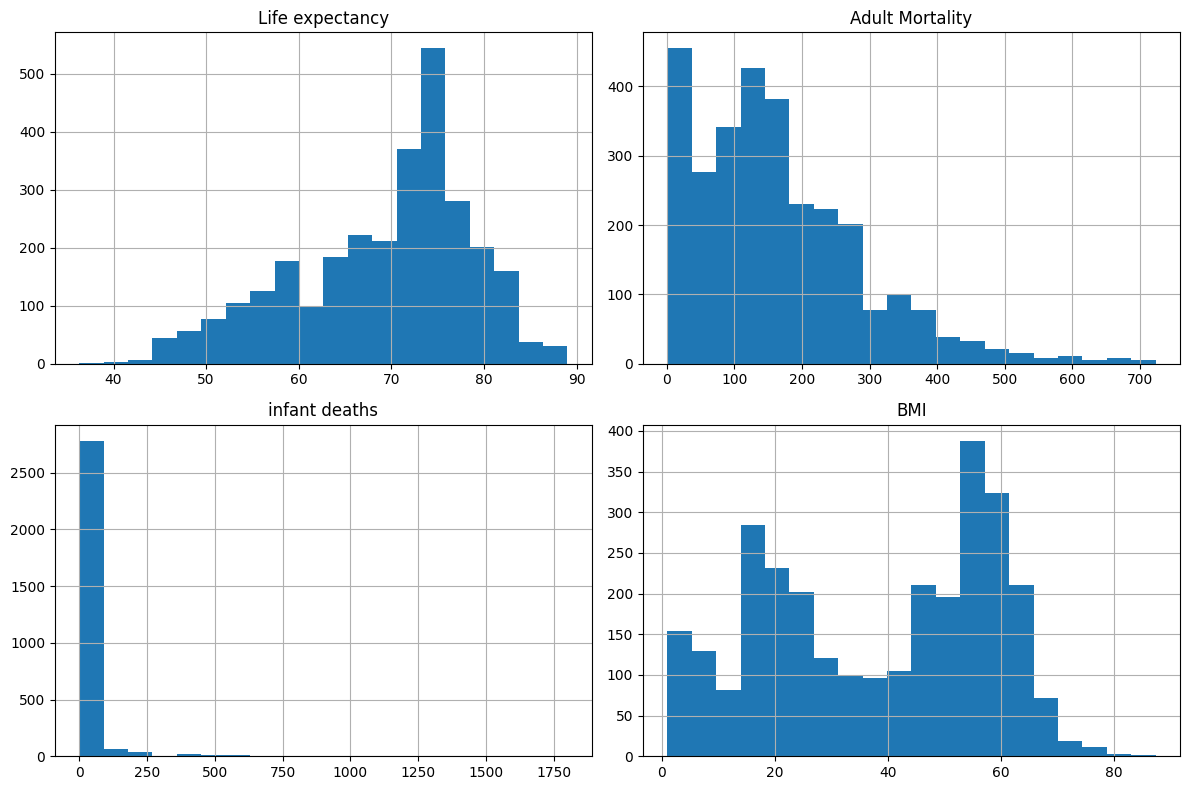

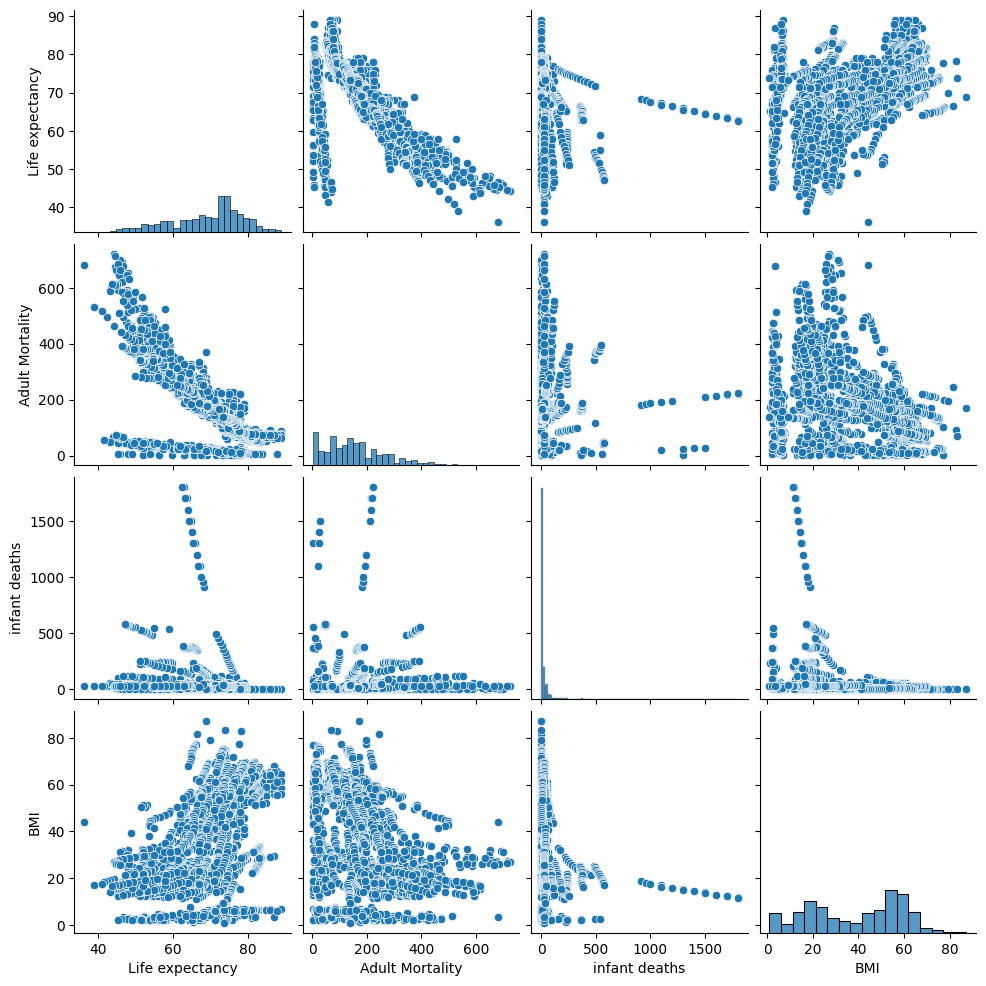

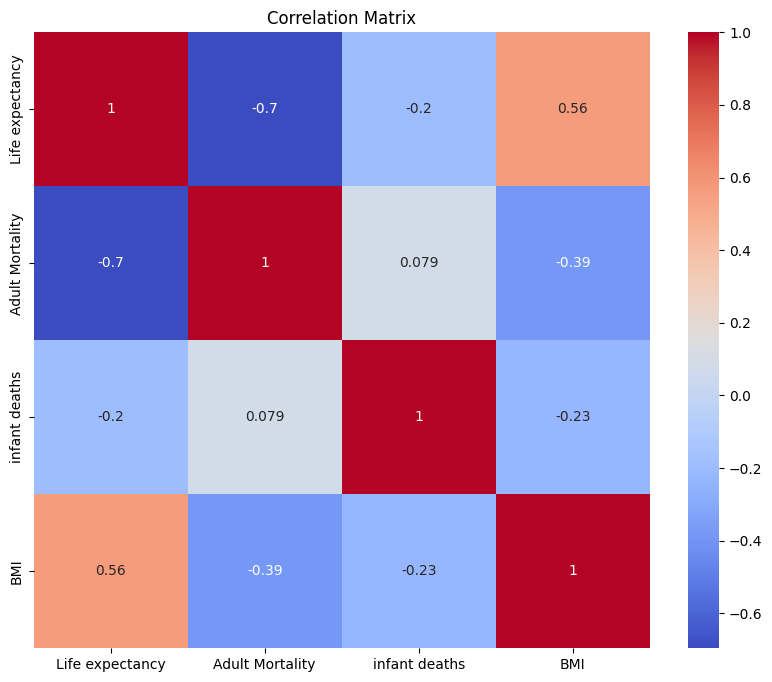

In [12]:
numerical_cols = ['Life expectancy', 'Adult Mortality', 'infant deaths', 'BMI'] 
categorical_cols = ['Status', 'Year', 'Country']
data.columns = data.columns.str.strip()
data[numerical_cols] = data[numerical_cols].apply(pd.to_numeric, errors='coerce')   
data[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()
sns.pairplot(data[numerical_cols])
plt.show()
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# The code using KNNImputer is applied to fill missing values in the specified columns of the 'data' DataFrame.
# KNNImputer estimates missing values based on the values of their nearest neighbors, which helps preserve data patterns and relationships.
# This is important for improving the quality of analysis and ensuring that machine learning models can be trained without issues caused by missing data.

In [13]:
# Linear Regression: Predicting Life Expectancy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select features and target
X = data[['Adult Mortality', 'infant deaths', 'BMI', 'Alcohol', 'GDP', 'Schooling']]
y = data['Life expectancy']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate
print("Linear Regression R^2 score:", lr.score(X_test, y_test))

Linear Regression R^2 score: 0.7497682579403387


In [14]:
# Logistic Regression: Predicting Status (Developed/Developing)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Encode categorical target
le = LabelEncoder()
y_cat = le.fit_transform(data['Status'])

# Use same features as above
X = data[['Adult Mortality', 'infant deaths', 'BMI', 'Alcohol', 'GDP', 'Schooling']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# Train model
logr = LogisticRegression(max_iter=1000)
logr.fit(X_train, y_train)

# Evaluate
print("Logistic Regression accuracy:", logr.score(X_test, y_test))

Logistic Regression accuracy: 0.9166666666666666


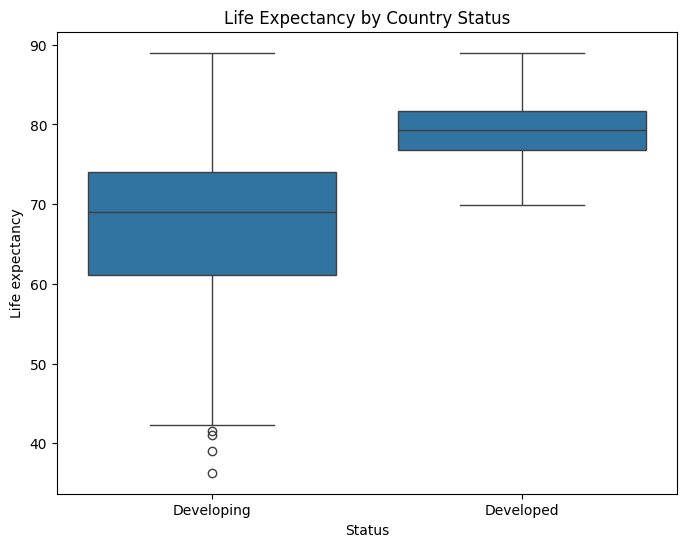

In [15]:
# Distribution of Life Expectancy by Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Life expectancy', data=data)
plt.title('Life Expectancy by Country Status')
plt.show()

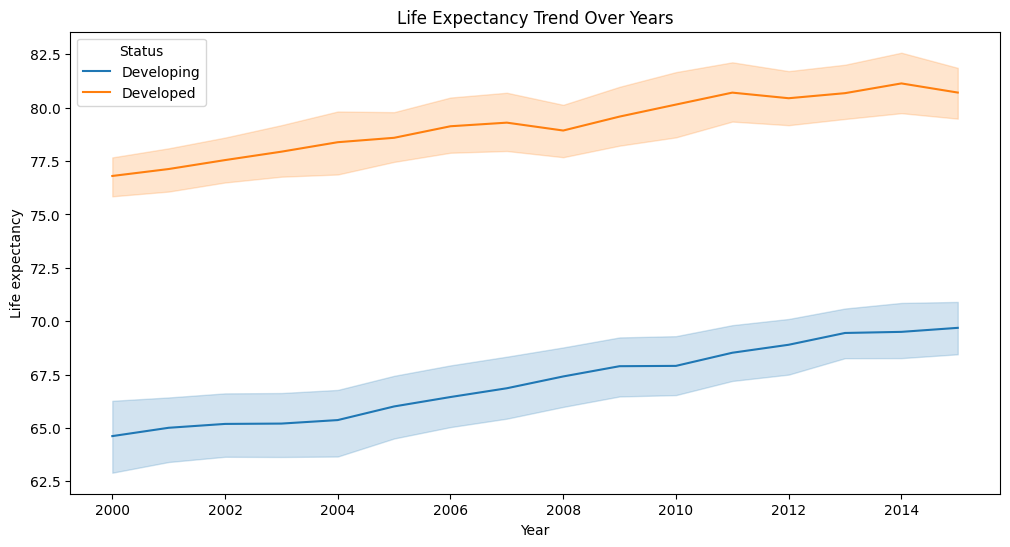

In [16]:
# Trend of Life Expectancy over Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Life expectancy', hue='Status', data=data)
plt.title('Life Expectancy Trend Over Years')
plt.show()

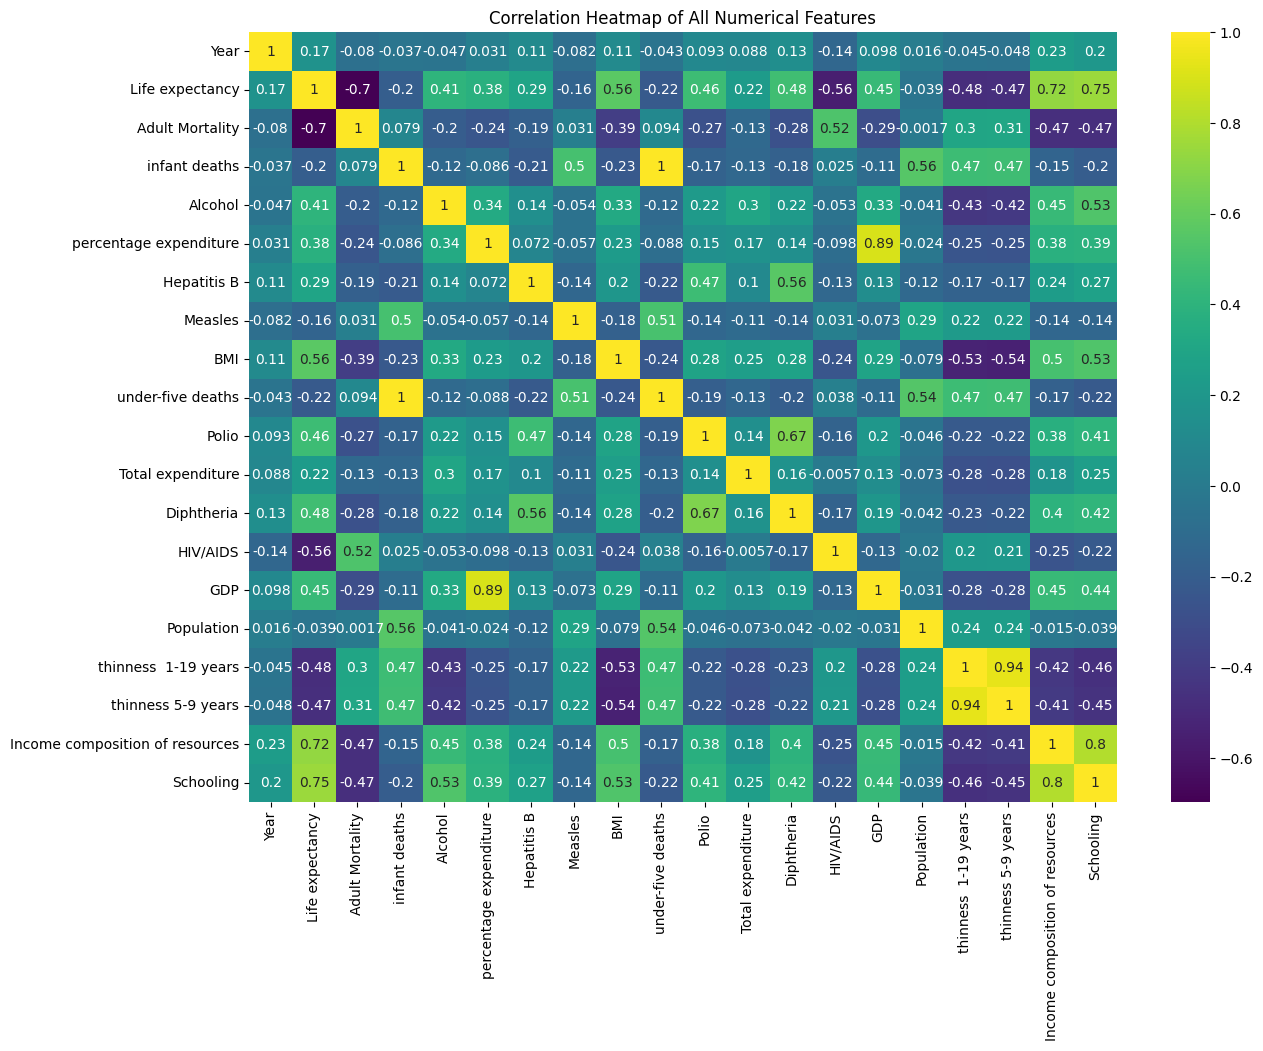

In [17]:
# Correlation heatmap for all numerical features
plt.figure(figsize=(14, 10))
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of All Numerical Features')
plt.show()

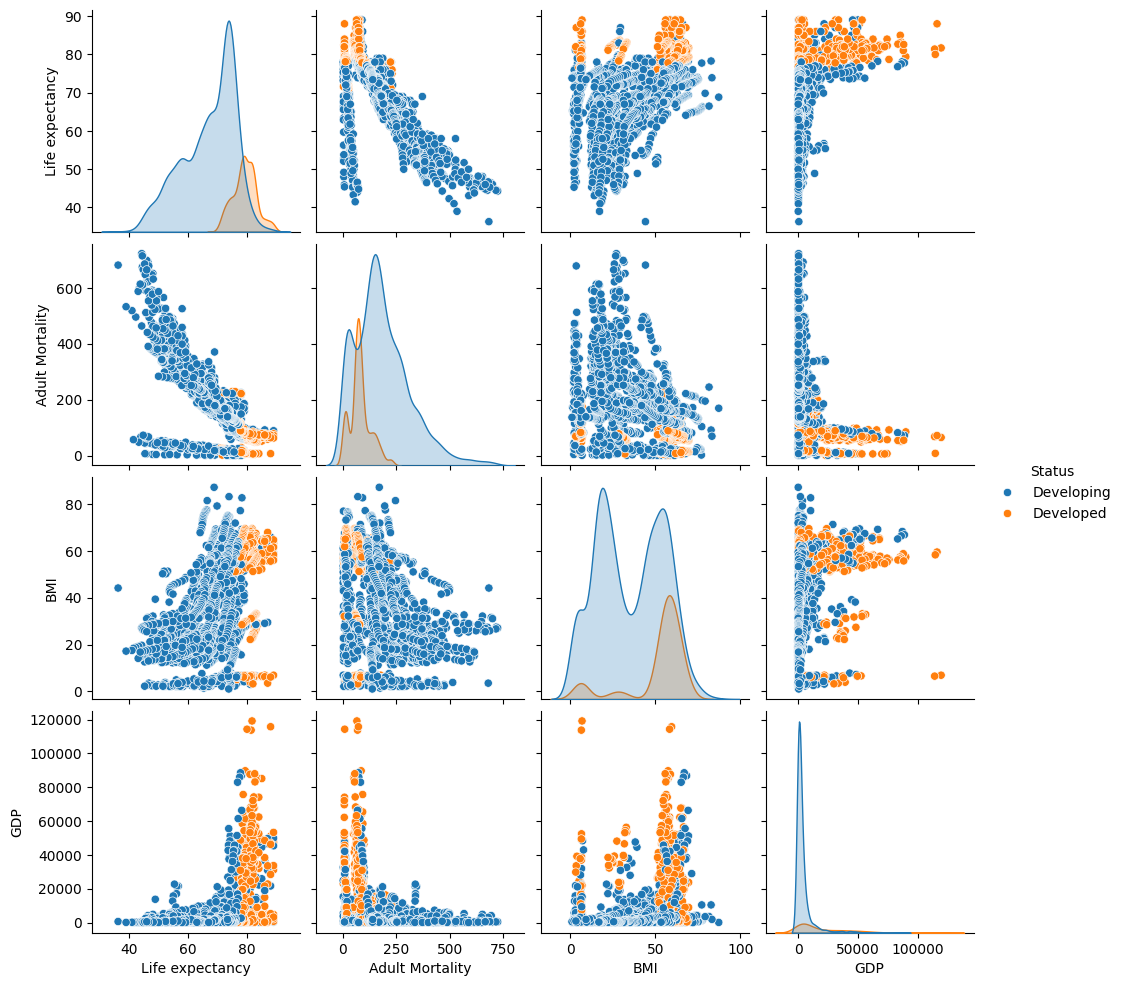

In [18]:
# Pairplot for selected features
sns.pairplot(data, vars=['Life expectancy', 'Adult Mortality', 'BMI', 'GDP'], hue='Status')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("D:/LIFE EXPECTANCY WHO/archive (1)/Life Expectancy Data.csv"
)
data_cleaned = data.dropna(subset=['Life expectancy '])

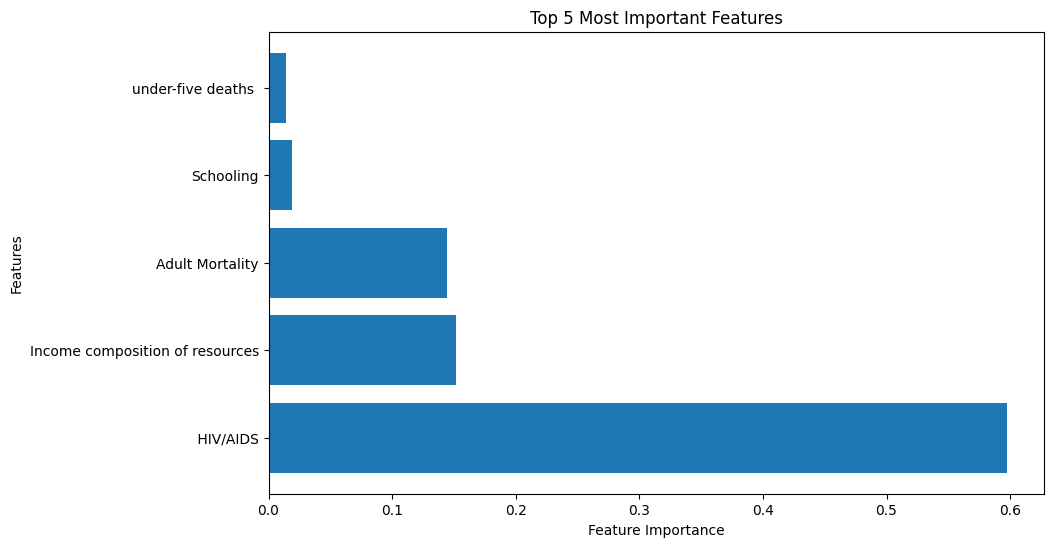

In [20]:
# Prepare the data
X = data_cleaned.drop(['Life expectancy '], axis=1)  # Independent variables
y = data_cleaned['Life expectancy ']  # Dependent variable

# Encode categorical variables
encoder = LabelEncoder()
X['Country'] = encoder.fit_transform(X['Country'])
X['Status'] = encoder.fit_transform(X['Status'])

# Impute missing values
imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)

# Create a Random Forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_imputed, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Extract the top 5 most important features
top_features = X.columns[indices][:5]
top_importances = feature_importances[indices][:5]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(5), top_importances, align='center')
plt.yticks(range(5), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 5 Most Important Features')
plt.show()


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Read the dataset
data = pd.read_csv("D:/LIFE EXPECTANCY WHO/archive (1)/Life Expectancy Data.csv")


# Drop rows with missing values in the target variable
data = data.dropna(subset=['Life expectancy '])

# Select the independent variables (features)
features = data[['Adult Mortality', 'infant deaths', ' BMI ', ' HIV/AIDS', 'Income composition of resources', 'Schooling']]

# Select the target variable (life expectancy)
target = data['Life expectancy ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Preprocess the data by imputing missing values in the features
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train_imputed, y_train)

# Make predictions on the test set
linear_predictions = linear_regression.predict(X_test_imputed)

# Evaluate Linear Regression model
linear_rmse = mean_squared_error(y_test, linear_predictions) ** 0.5
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

# Decision Tree Regression
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_imputed, y_train)

# Make predictions on the test set
tree_predictions = decision_tree.predict(X_test_imputed)

# Evaluate Decision Tree model
tree_rmse = mean_squared_error(y_test, tree_predictions) ** 0.5
tree_mae = mean_absolute_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)

# Random Forest Regression
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_imputed, y_train)

# Make predictions on the test set
forest_predictions = random_forest.predict(X_test_imputed)

# Evaluate Random Forest model
forest_rmse = mean_squared_error(y_test, forest_predictions) ** 0.5
forest_mae = mean_absolute_error(y_test, forest_predictions)
forest_r2 = r2_score(y_test, forest_predictions)

# Print the evaluation metrics
print("Linear Regression:")
print("RMSE:", linear_rmse)
print("MAE:", linear_mae)
print("R-squared:", linear_r2)
print("\nDecision Tree Regression:")
print("RMSE:", tree_rmse)
print("MAE:", tree_mae)
print("R-squared:", tree_r2)
print("\nRandom Forest Regression:")
print("RMSE:", forest_rmse)
print("MAE:", forest_mae)
print("R-squared:", forest_r2)

Linear Regression:
RMSE: 4.353212222786511
MAE: 3.2227505158456644
R-squared: 0.7809180624633232

Decision Tree Regression:
RMSE: 2.3434827208235682
MAE: 1.3310580204778155
R-squared: 0.9365092576904606

Random Forest Regression:
RMSE: 1.6677769205308273
MAE: 1.077808873720137
R-squared: 0.9678439413225183


c:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\HP\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\HP\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable

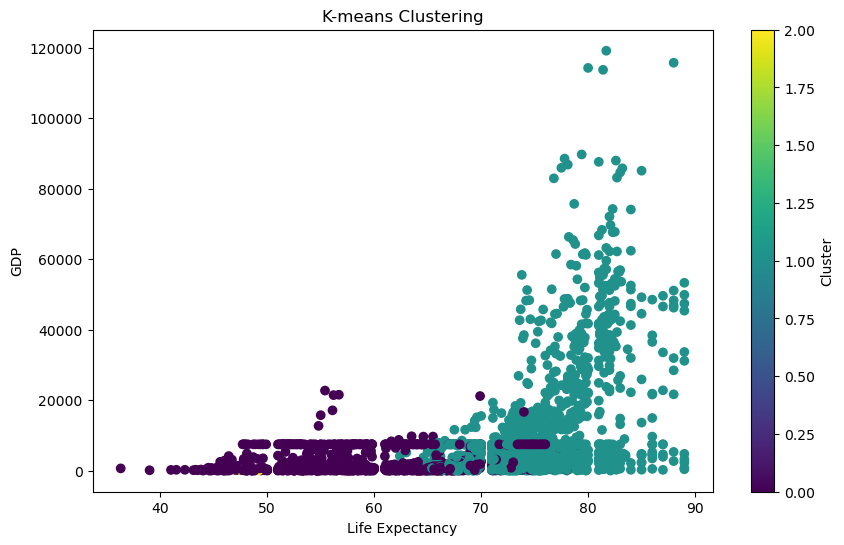

In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Use the cleaned dataframe
# Select the columns to use for clustering
columns_for_clustering = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

# Perform data imputation
imputer = SimpleImputer(strategy='mean')
data_cleaned[columns_for_clustering] = imputer.fit_transform(data_cleaned[columns_for_clustering])

# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned[columns_for_clustering])

# Perform K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Explicitly set the value of n_init
kmeans.fit(scaled_data)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original dataset
data_cleaned['Cluster'] = cluster_labels

# Visualize the clusters (example using two variables)
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Life expectancy '], data_cleaned['GDP'], c=cluster_labels, cmap='viridis')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


# Select the columns for modeling
columns_for_modeling = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
                        'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
                        'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
                        ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Life expectancy ']

# Perform data imputation
imputer = SimpleImputer(strategy='mean')
data_cleaned[columns_for_modeling] = imputer.fit_transform(data_cleaned[columns_for_modeling])

# Split the dataset into training and testing sets
X = data_cleaned[columns_for_modeling[:-1]]  # Excluding the target variable
y = data_cleaned['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future life expectancy
future_data = pd.DataFrame({
    'Year': [2022, 2023, 2024],  # Add future years here
    'Adult Mortality': [200, 180, 160],  # Add corresponding values for other variables
    'infant deaths': [10, 8, 6],
    'Alcohol': [5.0, 5.5, 6.0],
    'percentage expenditure': [1000, 1200, 1500],
    'Hepatitis B': [80, 85, 90],
    'Measles ': [50, 40, 30],
    ' BMI ': [25.5, 26.0, 26.5],
    'under-five deaths ': [20, 18, 15],
    'Polio': [90, 92, 94],
    'Total expenditure': [6.5, 6.0, 5.5],
    'Diphtheria ': [90, 92, 94],
    ' HIV/AIDS': [0.1, 0.2, 0.3],
    'GDP': [5000, 5500, 6000],
    'Population': [1000000, 1200000, 1500000],
    ' thinness  1-19 years': [10.0, 9.5, 9.0],
    ' thinness 5-9 years': [9.0, 8.5, 8.0],
    'Income composition of resources': [0.8, 0.85, 0.9],
    'Schooling': [12, 13, 14]
})

future_life_expectancy = model.predict(future_data)

print(future_life_expectancy)

[69.41333994 70.88551538 72.44335714]


In [28]:
import joblib

# Ensure scaler is defined
from sklearn.preprocessing import StandardScaler
columns_for_clustering = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned[columns_for_clustering])

joblib.dump(model, 'life_expectancy_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']